In [3]:
import numpy as np
from scipy import special
from scipy import linalg
from matplotlib import pyplot as plt

$\mathbf{Задача 1}$ 

Генераторы:

In [41]:
def random_matrix(n, min_value, max_value):
    return np.random.randint(min_value, max_value, size=[n, n])
def random_diagonal(n, min_value, max_value):
    return np.diag(np.random.randint(min_value, max_value, size=[n]))
def random_upper_triangular(n, min_value, max_value):
    return np.triu(random_matrix(n, min_value, max_value))
def random_lower_triangular(n, min_value, max_value):
    return random_matrix(n, min_value, max_value).tril()
def random_sym(n, min_value, max_value):
    A = random_upper_triangular(n, min_value, max_value)
    return (A + A.T - np.diag(np.diag(A)))
def random_singular(n, min_value, max_value):
    A = random_matrix(n, min_value, max_value)
    ind1, ind2, ind3 = np.random.choice(range(n), 3, replace=False)
    tmp = A[ind1]
    A[ind1] = np.ceil(((A[ind2] + A[ind3]) / 2))
    A[ind2] = 2 * A[ind1] - A[ind3]
    return A
def random_ladder_with_given_rank(n, min_value, max_value, m):
    A = random_upper_triangular(n, min_value, max_value)
    t = np.floor((max_value + min_value) / 2)
    if t == 0:
        t = 1
    A[np.diag(np.diag(A)==0)] = t
    A[m:n,:] = np.zeros((n - m, n))
    return A
def random_perturbation(n, m, eps):
    return np.random.uniform(-eps, eps, size=[n, m])

Оценим вероятность того, что случайная матрица из функции random_matrix окажется вырожденной

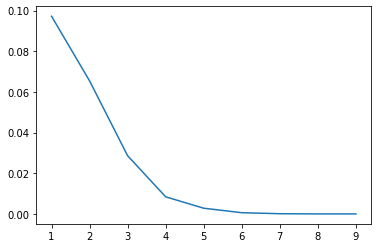

In [3]:
k = 0
tries = 10000
ns = 10
M = 5
ans = np.zeros(ns - 1)
for j in range(1, ns):
    n = j
    k = 0
    for i in range(tries):
        A = random_matrix(n, -M, M)
        if np.linalg.matrix_rank(A) != n:
            k += 1
    ans[j - 1] = (k / tries)
plt.plot(np.array(range(1, ns)), ans)

Вероятность вырождения крайне быстро падает с ростом размера матрицы

Оценим L2 норму матрицы возмущений в зависимости от $\varepsilon$

In [4]:
def L2(A):
    return (np.amax(np.linalg.eigvals(A.T @ A)))**0.5
eps = 0.05
N = 100
results = np.zeros(N)
for i in range(N):
    n = 10
    A = random_perturbation(n, n, eps)
    results[i] = L2(A) / eps
print(results.mean(), results.std())

3.1848653352875917 0.2696876659602285


В среднем L2 норма матрицы возмущений в 3 раза превышает $\varepsilon$

$\mathbf{Задача 2}$

In [5]:
def exp(x, modified=True):
    invert = False
    if modified == True:
        if x < 0:
            x = -x
            invert = True
    
    y = 1
    n = 1
    n_factorial = 1
    while y != y + x ** n / n_factorial:
        y = y + x ** n / n_factorial
        n += 1
        n_factorial *= n  
    if invert == True:
        y = 1 / y
    return y

print(exp(-10, modified=False))
print(exp(-10, modified=True))
print(np.exp(-10))
print('eps1 = ' + str(abs(exp(-10, modified=False) - np.exp(-10)) / np.exp(-10) ))
print('eps2 = ' + str(abs(exp(-10, modified=True) - np.exp(-10)) / np.exp(-10) ))


4.5399929433607724e-05
4.539992976248486e-05
4.5399929762484854e-05
eps1 = 7.2440008560647795e-09
eps2 = 1.4925713791816933e-16


In [6]:
def ln(x):
    y = 0
    n = 1
    x -= 1
    while y != y + x**n / n * (-1)**(n + 1):
        y = y + x**n / n * (-1)**(n + 1)
        n += 1
    return y
# x must be 0 < x < 2
print(ln(1.9))
print(np.log(1.9))
print('eps = '+str(np.abs(ln(1.9) - np.log(1.9)) / np.log(1.9)))

0.6418538861723935
0.6418538861723947
eps = 1.9026843233284708e-15


In [7]:
def sin(x, modified=True):
    y = 0
    n = 1
    n_factorial = 1
    if modified:
        x = x % (2 * np.pi) # can be done better but(make x from -pi/2 to pi/2) but it need more ifs...
    while y != y + x**n / n_factorial * (-1)**((n + 1) / 2):
        y = y + x**n / n_factorial * (-1)**((n + 1) / 2)
        n_factorial = n_factorial * (n + 1) * (n + 2)
        n += 2
    return y
print(sin(11 * np.pi, modified=False))
print(sin(11 * np.pi))
print(np.sin(11 * np.pi))

-0.003933512359032309
-3.915421574187413e-15
4.899825157862589e-15


In [8]:
def cos(x, modified=True):
    y = 1
    n = 2
    n_factorial = 2
    if modified:
        x = x % (2 * np.pi) # can be done better but(make x from -pi/2 to pi/2) but it need more ifs...
    while y != y + x**n / n_factorial * (-1)**(n / 2):
        y = y + x**n / n_factorial * (-1)**(n / 2)
        n_factorial = n_factorial * (n + 1) * (n + 2)
        n += 2
    return y
print(cos(11 * np.pi + 0.1, modified=False))
print(cos(11 * np.pi + 0.1))
print(np.cos(11 * np.pi + 0.1))

-1.0162797280573401
-0.995004165278026
-0.9950041652780262


In [36]:
bernoulli = scipy.special.bernoulli(1000)
print(bernoulli[0:10])
def tan(x):
    y = 0
    n = 1
    n2_fact = 2
    while y != y + (-1)**(n-1) * 2**(2 * n) * (2**(2 * n) - 1) / n2_fact * bernoulli[2 * n] * x**(2 * n - 1):
        y = y + (-1)**(n-1) * 2**(2 * n) * (2**(2 * n) - 1) / n2_fact * bernoulli[2 * n] * x**(2 * n - 1)
        n = n + 1
        n2_fact = n2_fact * (2 * n)
    return y
print(tan(0.5), np.tan(0.5))

[ 1.         -0.5         0.16666667  0.         -0.03333333  0.
  0.02380952  0.         -0.03333333  0.        ]
inf 0.5463024898437905


In [10]:
def cot(x):
    pass
    

$\mathbf{Задача 3}$

Реазизуем вычисление основных векторных и подчиненных им матричных норм. Заметим, что матричная норма подчиненная векторной, примененная к вектору как столбцу, дает искомую векторную норму. Поэтому не нужно писть различные функции для векторной и для матричной норм.

In [11]:
def L2(A, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(A.shape) == 1:
            A = A.reshape((-1, 1))
    return (np.amax(np.linalg.eigvals(A.T @ A)))**0.5

def L1(A, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(A.shape) == 1:
            A = A.reshape((-1, 1))
    A = np.abs(A)
    return np.amax(np.sum(A, axis=0))

def Linf(A, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(A.shape) == 1:
            A = A.reshape((-1, 1))
    A = np.abs(A)
    return np.amax(np.sum(A, axis=1))

def cond_number(A, norm):
    if A.shape[0] != A.shape[1]:
        return np.infty
    if np.linalg.matrix_rank(A) != A.shape[0]:
        return np.infty
    return norm(A) * norm(np.linalg.inv(A))

In [12]:
cond_number(np.array([[1, 2],[2, 3]]), L1)


25.0

$\mathbf{Задача 4}$

In [44]:
def gauss_transfrom(A):
    n, m = A.shape
    pos = 0
    A = A.astype(np.float)
    for i in range(m):
        non_zero_elem_ind = -1
        for j in range(pos, n):
            if A[j, i] != 0:
                non_zero_elem_ind = j
                break
        if non_zero_elem_ind != -1:
            A[[pos, non_zero_elem_ind]] = A[[non_zero_elem_ind, pos]]
        else:
            continue
        for j in range(pos + 1, n):
            A[j] = A[j] -  A[pos] / A[pos, i] * A[j, i]
        pos += 1
        #print(A)
    return A
    

In [70]:
def get_rank(A):
    A = gauss_transfrom(A)
    return np.sum(np.any(A, axis=1))

Проверим, как работает функция вычисления ранга

In [76]:
A = random_ladder_with_given_rank(5, -1, 1, 3)
get_rank(A)

3

In [78]:
A = random_ladder_with_given_rank(5, -1, 1, 1)
get_rank(A)

1

In [77]:
A = random_ladder_with_given_rank(5, -1, 1, 5)
get_rank(A)

5

$\mathbf{Задача 5}$

In [141]:
def gauss_solver(A, f):
    A = np.array(A, dtype='float')
    f = np.array(f, dtype='float')
    f = f.reshape(1, -1)
    n = f.shape[1]
    x = np.zeros(n)
    if get_rank(A) != n:
        return -1
    Af = np.concatenate((A, f.reshape(n, 1)), axis=1)
    Af = gauss_transfrom(Af)
    for i in range(n-1, -1, -1):
        tmp = 0.0
        for j in range(i + 1, n):
            tmp += x[j] * Af[i, j]
        x[i] = (Af[i, n] - tmp) / Af[i, i]
    return x

In [142]:
B = np.array([
    [1, 3, 1],
    [0, 2, 0],
    [0, 0, 1]
])
f = [2, 1, 1]
gauss_solver(B, f)

array([-0.5,  0.5,  1. ])

Прямой ход метода Гаусса требует O(n^3) операций, обратный: O(n^2). Итого, O(n^3).

$\mathbf{Задача 6}$

Вычислим число обсусловленности матрицы экспериментально, через возмущения правых частей

In [190]:
N = 50
A = random_matrix(N, -10, 10)
get_rank(A)

50

In [191]:
f = np.ones(N)
print(np.linalg.solve(A, f))
print(gauss_solver(A, f))

[-0.13008976  0.00978762 -0.05207421  0.07981898 -0.0277966   0.08129757
  0.0188701  -0.20710573 -0.03601425 -0.07485865 -0.00111241 -0.17967732
 -0.12642727  0.20328641  0.15868091  0.2013163  -0.12446165 -0.07624925
  0.10430679 -0.05535733  0.05435255 -0.05662363  0.15245702 -0.06261548
 -0.07083464 -0.03452267  0.09219604  0.06601068  0.0724405   0.15079798
 -0.18431672  0.00291216 -0.07251482  0.05572004 -0.11721646 -0.00984809
 -0.04498616 -0.04371977  0.03043347  0.00511603  0.05396578  0.00356752
 -0.02386192  0.01626967  0.13330144  0.08602258  0.04428195  0.05913807
  0.10412632  0.24531577]
[-0.13008976  0.00978762 -0.05207421  0.07981898 -0.0277966   0.08129757
  0.0188701  -0.20710573 -0.03601425 -0.07485865 -0.00111241 -0.17967732
 -0.12642727  0.20328641  0.15868091  0.2013163  -0.12446165 -0.07624925
  0.10430679 -0.05535733  0.05435255 -0.05662363  0.15245702 -0.06261548
 -0.07083464 -0.03452267  0.09219604  0.06601068  0.0724405   0.15079798
 -0.18431672  0.00291216 

In [192]:
x = gauss_solver(A, f)
mu = 1.0
# print(x)
for i in range(1000):
    f1 = f + np.random.uniform(-0.05, 0.05, size = N)
    x1 = gauss_solver(A, f1)
    tmp = (np.linalg.norm(x1 - x) / np.linalg.norm(x)) / (np.linalg.norm(f1 - f) / np.linalg.norm(f))
    mu = max(mu, tmp)
print(mu, np.linalg.cond(A))

5.608393197819258 84.16273285020455


In [189]:
C = np.array([
    [2, 0], 
    [0, 2]
])
np.linalg.cond(C)

1.0